**Scraping e analisi privato.eco**

In [168]:
import requests

In [170]:
base_url = "https://www.privatoeco.com/"
list_details = "collections/scarpe-vegan-donna"
list_url = base_url + list_details

print(list_url)

https://www.privatoeco.com/collections/scarpe-vegan-donna


In [172]:
headers = {"User-Agent":"Chrome/128.0"}
req = requests.get(list_url, headers=headers)
print(req)

<Response [200]>


In [174]:
from bs4 import BeautifulSoup

In [176]:
soup = BeautifulSoup(req.text)
#print(soup) 

In [178]:
nome_prodotto = soup.find_all("a", class_ = "m-product-card__name m:uppercase")
print(nome_prodotto[0:5])

[<a class="m-product-card__name m:uppercase" href="/products/sneakers-con-zeppa-gianna-rosa-vegane-ecologiche">
            Sneakers con zeppa Gianna rosa, vegane ecologiche
          </a>, <a class="m-product-card__name m:uppercase" href="/products/sneakers-con-zeppa-gianna-floreale-vegane-ecologiche">
            Sneakers con zeppa Gianna floreale, vegane ecologiche
          </a>, <a class="m-product-card__name m:uppercase" href="/products/sneakers-save-the-ocean-bianco-celeste-vegane-ecologiche">
            Sneakers Save the ocean bianco celeste, vegane ecologiche
          </a>, <a class="m-product-card__name m:uppercase" href="/products/sneakers-save-the-ocean-bianco-nero-vegane-ecologiche">
            Sneakers Chiara Elisa bianco nude, vegane ecologiche
          </a>, <a class="m-product-card__name m:uppercase" href="/products/sneakers-lauren-bianco-nero-vegane-ecologiche">
            Sneakers Lauren bianco nero, vegane ecologiche
          </a>]


In [180]:
nome_prodotto[0].text

'\n            Sneakers con zeppa Gianna rosa, vegane ecologiche\n          '

In [182]:
nomi_prodotti = []

for nome in nome_prodotto :
    nomi_prodotti.append(nome.text.strip())
print(nomi_prodotti)

['Sneakers con zeppa Gianna rosa, vegane ecologiche', 'Sneakers con zeppa Gianna floreale, vegane ecologiche', 'Sneakers Save the ocean bianco celeste, vegane ecologiche', 'Sneakers Chiara Elisa bianco nude, vegane ecologiche', 'Sneakers Lauren bianco nero, vegane ecologiche', 'Sneakers Lauren bianco latte, vegane ecologiche', 'Sneakers Lauren bianco beige, vegane ecologiche', 'Sneakers Lauren bianco verde, vegane ecologiche', 'Sneakers Lauren bianco lilla, vegane ecologiche', 'Sneakers Lauren bianco oro, vegane ecologiche', 'Sneakers Lauren bianco arancio, vegane ecologiche', 'Sneakers Lauren bianco jeans, vegane ecologiche', 'Sneakers Appleskin bianco silver, vegane ecologiche', 'Sneakers Lauren bianco argento, vegane ecologiche', 'Sneakers Chiara Elisa nero, vegane ecologiche', 'Sneakers Chiara Rita giallo, vegane ecologiche', 'Sneakers Chiara Rita rosa, vegane ecologiche', 'Sneakers Chiara Elisa bianca, vegane ecologiche', 'Sneakers Save the ocean bianco rosa, vegane ecologiche', '

In [184]:
prezzi_listino = []

prodotti = soup.find_all("div", class_="m-price")

for prodotto in prodotti:
    prezzo = None

    tag_s = prodotto.find("s", class_="m-price-item m-price-item--regular")
    if tag_s and tag_s.text.strip():
        prezzo = tag_s.text.strip()
    else:
        tag_span = prodotto.find("span", class_="m-price-item m-price-item--regular")
        if tag_span and tag_span.text.strip():
            prezzo = tag_span.text.strip()

    prezzi_listino.append(prezzo if prezzo else "N/D")



#problema prezzi sotto diverso tag risolto

In [186]:
print(prezzi_listino)

['€90,99', '€90,99', '€87,99', '€97,99', '€124,99', '€124,99', '€127,99', '€124,99', '€124,99', '€124,99', '€124,99', '€128,99', '€99,99', '€124,99', '€95,99', '€64,99', '€64,99', '€94,99', '€85,99', '€87,99', '€95,00', '€95,00', '€96,00', '€96,00', '€99,00', '€99,00', '€85,99', '€97,50', '€97,50', '€97,50', '€97,50', '€79,99', '€94,99', '€94,00', '€94,00', '€79,99', '€69,00', '€69,00', '€69,00', '€69,00']


In [188]:
link_prodotti = [base_url + link.get("href") for link in nome_prodotto]
print(link_prodotti)

['https://www.privatoeco.com//products/sneakers-con-zeppa-gianna-rosa-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-con-zeppa-gianna-floreale-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-save-the-ocean-bianco-celeste-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-save-the-ocean-bianco-nero-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-lauren-bianco-nero-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-lauren-bianco-latte-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-lauren-bianco-beige-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-lauren-bianco-verde-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-lauren-bianco-lilla-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-lauren-bianco-oro-vegane-ecologiche', 'https://www.privatoeco.com//products/sneakers-lauren-bianco-arancio-vegane-ecologiche', 'https://www.priva

In [190]:
for link_prodotto in link_prodotti: 
    req_into = requests.get(link_prodotto, headers=headers)
    #print(req_into)

In [192]:
soup_into = BeautifulSoup(req_into.text)

In [194]:
categoria_prodotti = []

for link_prodotto in link_prodotti:
    response = requests.get(link_prodotto, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    tipi = soup.find_all("div", class_="m-product-meta--value")
    
    if len(tipi) >= 2 and tipi[1].text.strip():
        categoria_prodotti.append(tipi[1].text.strip())
    else:
        categoria_prodotti.append("N/D")

print(categoria_prodotti)
  

['Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Sneakers da donna', 'Stivali da donna', 'Stivali da donna', 'Stivali da donna', 'Stivali da donna', 'Stivali da donna', 'Stivali da donna', 'Mocassini da donna', 'Mocassini da donna', 'Mocassini da donna', 'Mocassini da donna', 'Mocassini da donna', 'Stivali da donna', 'Stivali da donna', 'Stivali da donna', 'Stivali da donna', 'Slip on da donna', 'Tacchi da donna', 'Tacchi da donna', 'Tacchi da donna', 'Tacchi da donna']


In [196]:
categoria_prodotti = [c.replace(" da donna", "").replace(" da uomo", "") for c in categoria_prodotti]
print(categoria_prodotti)

['Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Sneakers', 'Stivali', 'Stivali', 'Stivali', 'Stivali', 'Stivali', 'Stivali', 'Mocassini', 'Mocassini', 'Mocassini', 'Mocassini', 'Mocassini', 'Stivali', 'Stivali', 'Stivali', 'Stivali', 'Slip on', 'Tacchi', 'Tacchi', 'Tacchi', 'Tacchi']


In [198]:
brand_prodotti = []

for link_prodotto in link_prodotti:
    response = requests.get(link_prodotto, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    tipi = soup.find_all("div", class_="m-product-meta--value")
    
    if len(tipi) >= 2 and tipi[0].text.strip():
        brand_prodotti.append(tipi[0].text.strip())
    else:
        brand_prodotti.append("N/D")

print(brand_prodotti)

['Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato', 'Privato']


In [200]:
sku_prodotti = []

for link_prodotto in link_prodotti:
    response = requests.get(link_prodotto, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    tipi = soup.find_all("div", class_="m-product-meta--value")
    
    if len(tipi) >= 2 and tipi[2].text.strip():
        sku_prodotti.append(tipi[2].text.strip())
    else:
        sku_prodotti.append("N/D")

print(sku_prodotti)

['SGR6', 'SGF6', 'SVC6', 'SCER6', 'SLBN6', 'SLL6', 'SLBG6', 'SLV6', 'SLLL6', 'SLO6', 'SLAR6', 'SLJ6', 'APPL6', 'SLA6', 'SCEN6', 'SRG6', 'SRR6', 'SCEB6', 'SVR6', 'SVN7', 'SJM6', 'SJN6', 'SDM6', 'SDN6', 'SSM6', 'SSN6', 'MA5', 'MEC6', 'MEGC6', 'MEGS6', 'MEN6', 'SE0', 'SKE6', 'SB5', 'SNO5', 'SON0', 'TSN5', 'TSR5', 'TVG8', 'TVB8']


In [202]:
taglie_prodotti = []

for link_prodotto in link_prodotti:
    response = requests.get(link_prodotto, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    contenitore_taglie = soup.find("div", class_="m-product-option--content m:inline-flex m:flex-wrap")

    if contenitore_taglie:
        # Estrai tutti i testi non vuoti e rimuovi duplicati
        taglie_raw = [el.text.strip() for el in contenitore_taglie.find_all() if el.text.strip() != ""]
        taglie_distinte = list(dict.fromkeys(taglie_raw))  # rimuove duplicati mantenendo l'ordine
        taglie_prodotti.append(", ".join(taglie_distinte))
    else:
        taglie_prodotti.append("N/D")

print(taglie_prodotti)


['36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41, 42', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41, 42', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41, 42', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '35, 36, 37, 38, 39, 40', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '36, 37, 38, 39, 40, 41', '35, 36, 37, 38, 39, 40, 41', '35, 36, 37, 38, 39, 40, 41', '35, 36, 37, 38, 39, 40', '40', '35, 36, 37, 38, 39, 40', '35, 36, 37, 38, 39, 40', '36, 37, 38, 39, 40, 41', '38, 

In [203]:
range_taglie = []

for taglie in taglie_prodotti:
    if taglie != "N/D":
        lista_taglie = taglie.split(", ")
        if len(lista_taglie) >= 2:
            range_taglie.append(f"{lista_taglie[0]} - {lista_taglie[-1]}")
        elif len(lista_taglie) == 1:
            range_taglie.append(f"{lista_taglie[0]} - {lista_taglie[0]}")
        else:
            range_taglie.append("N/D")
    else:
        range_taglie.append("N/D")

print(range_taglie)


['36 - 41', '36 - 41', '36 - 41', '36 - 42', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 36', '36 - 41', '36 - 42', '36 - 41', '36 - 41', '36 - 42', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '35 - 40', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '36 - 41', '35 - 41', '35 - 41', '35 - 40', '40 - 40', '35 - 40', '35 - 40', '36 - 41', '38 - 41']


In [206]:
colore_prodotto = []

for nome in nomi_prodotti:
    if "," in nome:
        prima_della_virgola = nome.split(",")[0].strip()
        parole = prima_della_virgola.split()
        ultima = parole[-1]
        colore_prodotto.append(ultima)
    else:
        parole = nome.strip().split()
        colore_prodotto.append(parole[-1] if parole else "N/D")

print(colore_prodotto)



['rosa', 'floreale', 'celeste', 'nude', 'nero', 'latte', 'beige', 'verde', 'lilla', 'oro', 'arancio', 'jeans', 'silver', 'argento', 'nero', 'giallo', 'rosa', 'bianca', 'rosa', 'nero', 'marrone', 'nero', 'marrone', 'nero', 'marrone', 'nero', 'lucido', 'cammello', 'chiaro', 'scuro', 'nero', 'elasticizzati', 'elasticizzati', 'nero', 'nero', 'nero', 'nero', 'nude', 'glicine', 'blue']


In [208]:
colore_prodotto = [colore.replace("elasticizzati", "nero") for colore in colore_prodotto]


In [210]:
print(colore_prodotto)

['rosa', 'floreale', 'celeste', 'nude', 'nero', 'latte', 'beige', 'verde', 'lilla', 'oro', 'arancio', 'jeans', 'silver', 'argento', 'nero', 'giallo', 'rosa', 'bianca', 'rosa', 'nero', 'marrone', 'nero', 'marrone', 'nero', 'marrone', 'nero', 'lucido', 'cammello', 'chiaro', 'scuro', 'nero', 'nero', 'nero', 'nero', 'nero', 'nero', 'nero', 'nude', 'glicine', 'blue']


In [212]:
#nomi_prodotti
#prezzi_listino
#link_prodotti
#categoria_prodotti
#sku_prodotti
#taglie_prodotti (range_taglie)
#colore_prodotto
mat_comp_prodotti = []

for link_prodotto in link_prodotti:
    response = requests.get(link_prodotto, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    materiale_composizione = soup.find("div", class_="metafield-rich_text_field")

    mat_comp_prodotti.append(materiale_composizione.text.strip())
   

print(mat_comp_prodotti)





['Sneakers realizzate in cotone naturale e stampa floreale.\nFodera in cotone naturale.\n\nSuola in TR riciclato ultra-light e juta naturale.\n\nSottopiede morbido extrasoft.\nImballaggio ecologico.\n\nCartolina piantabile.\n\nApprovato PETA.\n\nMade in Italy.', 'Sneakers realizzate in cotone naturale e stampa floreale.\nFodera in cotone naturale.\n\nSuola in TR riciclato ultra-light e juta naturale.\n\nSottopiede morbido extrasoft.\nImballaggio ecologico.\n\nCartolina piantabile.\n\nApprovato PETA.\n\nMade in Italy.', 'Tomaia: 42% PES riciclato 58% PU senza DMF\nFodera: 100% cotone naturale\nSuola: TR riciclato (pre-consumo) - altezza 2.5cm\nEtichetta: carta riciclata\nScatola da scarpe: carta riciclata', 'Tomaia: 42% PES riciclato 58% PU senza DMF\nFodera: 100% cotone naturale\nSuola: TR riciclato (pre-consumo) - altezza 2.5cm\nEtichetta: carta riciclata\nScatola da scarpe: carta riciclata', 'Tomaia: 42% PES riciclato 58% PU senza DMF\nFodera: 100% cotone naturale\nSuola: gomma legge

In [213]:
mat_comp_prodotti = [descrizione.replace("\n", "") for descrizione in mat_comp_prodotti]
print(mat_comp_prodotti)

['Sneakers realizzate in cotone naturale e stampa floreale.Fodera in cotone naturale.Suola in TR riciclato ultra-light e juta naturale.Sottopiede morbido extrasoft.Imballaggio ecologico.Cartolina piantabile.Approvato PETA.Made in Italy.', 'Sneakers realizzate in cotone naturale e stampa floreale.Fodera in cotone naturale.Suola in TR riciclato ultra-light e juta naturale.Sottopiede morbido extrasoft.Imballaggio ecologico.Cartolina piantabile.Approvato PETA.Made in Italy.', 'Tomaia: 42% PES riciclato 58% PU senza DMFFodera: 100% cotone naturaleSuola: TR riciclato (pre-consumo) - altezza 2.5cmEtichetta: carta riciclataScatola da scarpe: carta riciclata', 'Tomaia: 42% PES riciclato 58% PU senza DMFFodera: 100% cotone naturaleSuola: TR riciclato (pre-consumo) - altezza 2.5cmEtichetta: carta riciclataScatola da scarpe: carta riciclata', 'Tomaia: 42% PES riciclato 58% PU senza DMFFodera: 100% cotone naturaleSuola: gomma leggera altezza 2.5cmEtichetta: carta riciclataScatola da scarpe: carta r

In [214]:
descrizioni_prodotti = []

for link in link_prodotti:
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    descrizione_tag = soup.find("div", class_="m-product-description rte")
    
    if descrizione_tag:
        testo = descrizione_tag.text.strip().replace("\n", " ")  # pulizia \n
        descrizioni_prodotti.append(testo)
    else:
        descrizioni_prodotti.append("N/D")  # se non esiste il div

print(descrizioni_prodotti)

['Sneakers color rosa antico in cotone e canapa naturale.Fodera in cotone naturale. Suola\xa0in TR riciclato\xa0ultra-light\xa0e\xa0juta naturale. Sottopiede morbido extrasoft.Imballaggio ecologico. Cartolina piantabile. Made in Italy.', 'Sneakers realizzate in\xa0cotone naturale\xa0e stampa floreale.Fodera in cotone naturale. Suola in TR riciclato\xa0ultra-light\xa0e\xa0juta naturale. Sottopiede morbido extrasoft.Imballaggio ecologico. Cartolina piantabile. Made in Italy.', 'Sneakers realizzate dalle bottiglie di plastica riciclate ideali per qualsiasi stagione. Fodera in 100% cotone naturale traspirante ed assorbente. Suola extra light in TR riciclato (pre-consumo),altezza 2,5 cm. Imballaggio ecologico. 100% Made in Italy .', 'Sneakers realizzate dalle bottiglie di plastica riciclate ideali per qualsiasi stagione. Bianche con inserto rosa nude. Fodera in 100% cotone naturale traspirante ed assorbente. Suola extra light in TR riciclato (pre-consumo),altezza 3 cm. Imballaggio ecologico

In [217]:
#nomi_prodotti
#prezzi_listino
#link_prodotti
#categoria_prodotti
#sku_prodotti
#taglie_prodotti (range_taglie)
#colore_prodotto
#mat_comp_prodotti
#descrizioni_prodotti

In [220]:
articoli = {"nome_prodotto":nomi_prodotti,
        "prezzo":prezzi_listino,
        "link":link_prodotti,
        "sesso" : "donna",
        "categoria": categoria_prodotti,
        "sku": sku_prodotti,
        "taglie": range_taglie,
        "colore" : colore_prodotto,
        "materiale e composizione" : mat_comp_prodotti,
        "descrizione" : descrizioni_prodotti,
        "brand":brand_prodotti   
           }

In [222]:
import pandas as pd

df_donna = pd.DataFrame(articoli)

df_donna


,nome_prodotto,prezzo,link,sesso,categoria,sku,taglie,colore,materiale e composizione,descrizione,brand
0,"Sneakers con zeppa Gianna rosa, vegane ecologiche","€90,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SGR6,36 - 41,rosa,Sneakers realizzate in cotone naturale e stamp...,Sneakers color rosa antico in cotone e canapa ...,Privato
1,"Sneakers con zeppa Gianna floreale, vegane eco...","€90,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SGF6,36 - 41,floreale,Sneakers realizzate in cotone naturale e stamp...,Sneakers realizzate in cotone naturale e stamp...,Privato
2,"Sneakers Save the ocean bianco celeste, vegane...","€87,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SVC6,36 - 41,celeste,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers realizzate dalle bottiglie di plastic...,Privato
3,"Sneakers Chiara Elisa bianco nude, vegane ecol...","€97,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SCER6,36 - 42,nude,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers realizzate dalle bottiglie di plastic...,Privato
4,"Sneakers Lauren bianco nero, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLBN6,36 - 41,nero,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
5,"Sneakers Lauren bianco latte, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLL6,36 - 41,latte,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
6,"Sneakers Lauren bianco beige, vegane ecologiche","€127,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLBG6,36 - 41,beige,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
7,"Sneakers Lauren bianco verde, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLV6,36 - 41,verde,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
8,"Sneakers Lauren bianco lilla, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLLL6,36 - 41,lilla,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
9,"Sneakers Lauren bianco oro, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLO6,36 - 41,oro,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato


In [224]:
nomi_prodotti_u = ['Sneakers uomo Kevin bianche, vegane ecologiche','Sneakers uomo Kevin nere, vegane ecologiche']
prezzi_listino_u = ['€79,99','€79,99']
link_prodotti_u = ['https://www.privatoeco.com/products/sneakers-uomo-kevin-bianche-vegane-ecologiche','https://www.privatoeco.com/products/sneakers-uomo-kevin-nere-vegane-ecologiche']
categoria_prodotti_u = ['Sneakers','Sneakers']
sku_prodotti_u = ['KB4','KN3']
range_taglie_u = ['44 - 46','43 - 46']
colore_prodotto_u = ['bianco','nero']
mat_comp_prodotti_u = ['Tomaia: 60% PU 40% PES Fodera: Bio PU Suola: 70% TR + 30% TR riciclato','Tomaia: 60% PU 40% PES Fodera:  Bio PU Suola: 70% TR + 30% TR riciclato']
descrizioni_prodotti_u = ['Sneakers da uomo bianche con retro nero realizzate da rifiuti di plastica riciclata. Morbidissime, imbottite e leggere. Fodera cotone naturale. Suola in TR riciclato ultra-light.Sottopiede morbido extra soft. Imballaggio ecologico. Cartolina piantabile. Approvato PETA. Made in Italy.','Sneakers da uomo nere con retro bianco realizzate da rifiuti di plastica riciclata. Morbidissime, imbottite e leggere. Fodera cotone naturale. Suola in TR riciclato ultra-light. Sottopiede morbido extra soft. Imballaggio ecologico. Cartolina piantabile. Approvato PETA.Made in Italy.']
brand_prodotti_u = ['Privato']

In [226]:
articoli_uomo = {
    "nome_prodotto":nomi_prodotti_u,
    "prezzo":prezzi_listino_u,
    "link":link_prodotti_u,
    "sesso" : "uomo",
    "categoria": categoria_prodotti_u,
    "sku": sku_prodotti_u,
    "taglie": range_taglie_u,
    "colore" : colore_prodotto_u,
    "materiale e composizione" : mat_comp_prodotti_u,
    "descrizione" : descrizioni_prodotti_u,
    "brand" : "Privato"
}

In [228]:
df_uomo = pd.DataFrame(articoli_uomo)

df_uomo


,nome_prodotto,prezzo,link,sesso,categoria,sku,taglie,colore,materiale e composizione,descrizione,brand
0,"Sneakers uomo Kevin bianche, vegane ecologiche","€79,99",https://www.privatoeco.com/products/sneakers-u...,uomo,Sneakers,KB4,44 - 46,bianco,Tomaia: 60% PU 40% PES Fodera: Bio PU Suola: 7...,Sneakers da uomo bianche con retro nero realiz...,Privato
1,"Sneakers uomo Kevin nere, vegane ecologiche","€79,99",https://www.privatoeco.com/products/sneakers-u...,uomo,Sneakers,KN3,43 - 46,nero,Tomaia: 60% PU 40% PES Fodera: Bio PU Suola: ...,Sneakers da uomo nere con retro bianco realizz...,Privato


In [230]:
df_uomo_donna= pd.concat([df_donna, df_uomo], ignore_index=True)
df_uomo_donna

,nome_prodotto,prezzo,link,sesso,categoria,sku,taglie,colore,materiale e composizione,descrizione,brand
0,"Sneakers con zeppa Gianna rosa, vegane ecologiche","€90,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SGR6,36 - 41,rosa,Sneakers realizzate in cotone naturale e stamp...,Sneakers color rosa antico in cotone e canapa ...,Privato
1,"Sneakers con zeppa Gianna floreale, vegane eco...","€90,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SGF6,36 - 41,floreale,Sneakers realizzate in cotone naturale e stamp...,Sneakers realizzate in cotone naturale e stamp...,Privato
2,"Sneakers Save the ocean bianco celeste, vegane...","€87,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SVC6,36 - 41,celeste,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers realizzate dalle bottiglie di plastic...,Privato
3,"Sneakers Chiara Elisa bianco nude, vegane ecol...","€97,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SCER6,36 - 42,nude,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers realizzate dalle bottiglie di plastic...,Privato
4,"Sneakers Lauren bianco nero, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLBN6,36 - 41,nero,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
5,"Sneakers Lauren bianco latte, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLL6,36 - 41,latte,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
6,"Sneakers Lauren bianco beige, vegane ecologiche","€127,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLBG6,36 - 41,beige,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
7,"Sneakers Lauren bianco verde, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLV6,36 - 41,verde,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
8,"Sneakers Lauren bianco lilla, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLLL6,36 - 41,lilla,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato
9,"Sneakers Lauren bianco oro, vegane ecologiche","€124,99",https://www.privatoeco.com//products/sneakers-...,donna,Sneakers,SLO6,36 - 41,oro,Tomaia: 42% PES riciclato 58% PU senza DMFFode...,Sneakers morbide e leggere con lacci effetto p...,Privato


In [232]:
df_uomo_donna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   nome_prodotto             42 non-null     object
 1   prezzo                    42 non-null     object
 2   link                      42 non-null     object
 3   sesso                     42 non-null     object
 4   categoria                 42 non-null     object
 5   sku                       42 non-null     object
 6   taglie                    42 non-null     object
 7   colore                    42 non-null     object
 8   materiale e composizione  42 non-null     object
 9   descrizione               42 non-null     object
 10  brand                     42 non-null     object
dtypes: object(11)
memory usage: 3.7+ KB


In [234]:
#Quanti articoli di scarpe vendiamo?
numero_articoli = len(df_uomo_donna)
print(f"Articoli totali venduti: {numero_articoli}")


Articoli totali venduti: 42


In [236]:
#Quanti articoli da donna vendiamo e quanti da uomo?
df_uomo_donna["sesso"].value_counts()


sesso
donna    40
uomo      2
Name: count, dtype: int64

In [238]:
#Quanti articoli vendiamo per tipologia?
df_uomo_donna["categoria"].value_counts()


categoria
Sneakers     22
Stivali      10
Mocassini     5
Tacchi        4
Slip on       1
Name: count, dtype: int64

In [240]:
df_uomo_donna["prezzo"] = df_uomo_donna["prezzo"].str.replace("€", "", regex=False)
df_uomo_donna["prezzo"] = df_uomo_donna["prezzo"].str.replace(",", ".", regex=False)
df_uomo_donna["prezzo"] = df_uomo_donna["prezzo"].astype(float)
#data cleaning della colonna prezzo

In [242]:
#prezzo medio
pm = round(df_uomo_donna["prezzo"].mean(),2)
pm

95.95

In [244]:
#prezzo medio per categoria
pm_categoria = round(df_uomo_donna.groupby("categoria")["prezzo"].mean(),2)
pm_categoria

categoria
Mocassini     95.20
Slip on       79.99
Sneakers     102.49
Stivali       94.30
Tacchi        69.00
Name: prezzo, dtype: float64

In [246]:
#prezzo medio per sesso
pm_sesso = round(df_uomo_donna.groupby("sesso")["prezzo"].mean(),2)
pm_sesso


sesso
donna    96.74
uomo     79.99
Name: prezzo, dtype: float64

In [248]:
df_uomo_donna.describe()

,prezzo
count,42.000000
mean,95.946190
std,18.673629
min,64.990000
25%,85.990000
50%,95.000000
75%,99.000000
max,128.990000


In [250]:
#prezzo minimo, massimo e media per categoria
df_uomo_donna.groupby("categoria")["prezzo"].agg(["min", "max", "mean"])


,min,max,mean
categoria,,,
Mocassini,85.99,97.50,95.198
Slip on,79.99,79.99,79.990
Sneakers,64.99,128.99,102.490
Stivali,79.99,99.00,94.298
Tacchi,69.00,69.00,69.000


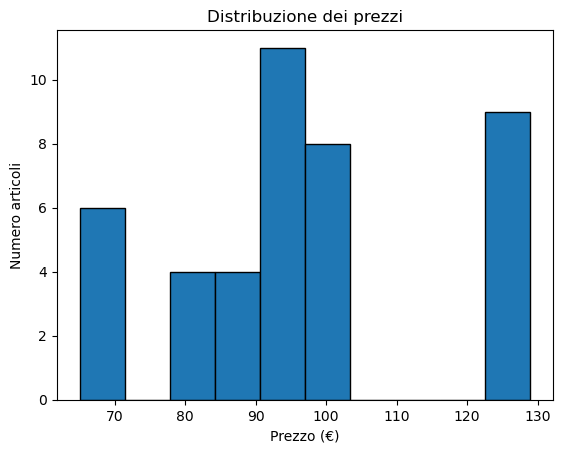

In [252]:
#Distribuzione dei prezzi

import matplotlib.pyplot as plt

plt.hist(df_uomo_donna["prezzo"], bins=10, edgecolor='black')
plt.title("Distribuzione dei prezzi")
plt.xlabel("Prezzo (€)")
plt.ylabel("Numero articoli")
plt.show()


In [254]:
bins = [0, 79.99, 99.99, 119.99, float('inf')]
labels = ["<79,99€", "80–99,99€", "100–119,99€", ">=120€"]

df_uomo_donna["fascia_prezzo"] = pd.cut(df_uomo_donna["prezzo"], bins=bins, labels=labels)



In [256]:
df_uomo_donna["fascia_prezzo"].value_counts(sort=False)



fascia_prezzo
<79,99€        10
80–99,99€      23
100–119,99€     0
>=120€          9
Name: count, dtype: int64

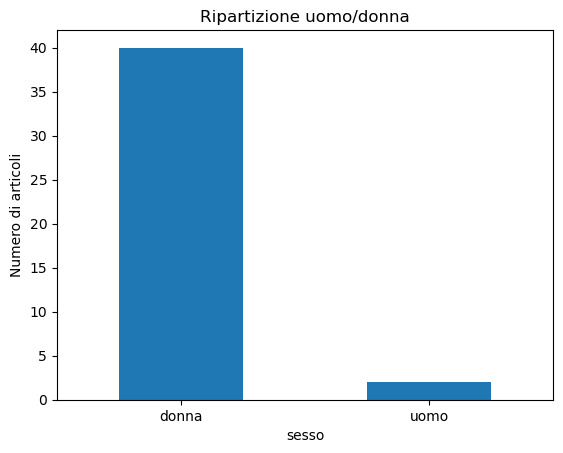

In [258]:
df_uomo_donna["sesso"].value_counts().plot(kind="bar", title="Ripartizione uomo/donna")

plt.xticks(rotation=0)  
plt.ylabel("Numero di articoli")
plt.show()

<Axes: title={'center': 'Articoli per tipologia'}, xlabel='categoria'>

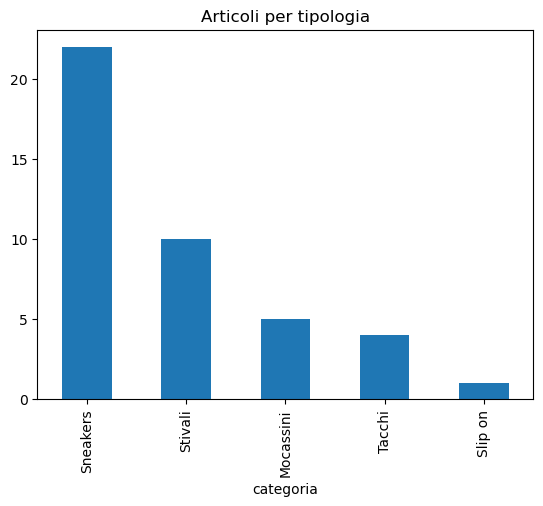

In [260]:
df_uomo_donna["categoria"].value_counts().plot(kind="bar", title="Articoli per tipologia")


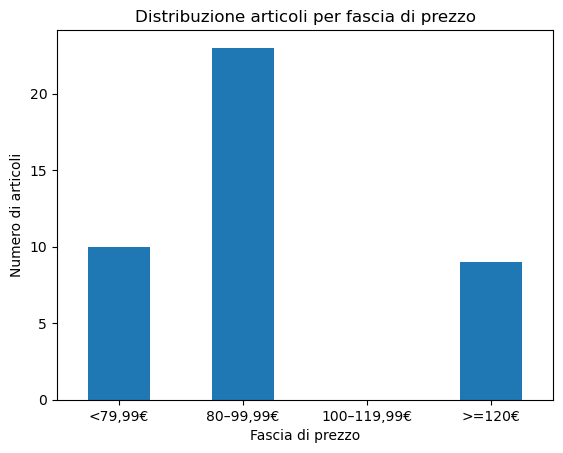

In [262]:
df_uomo_donna["fascia_prezzo"].value_counts(sort=False).plot(kind="bar")
plt.title("Distribuzione articoli per fascia di prezzo")
plt.xticks(rotation=0)  
plt.xlabel("Fascia di prezzo")
plt.ylabel("Numero di articoli")
plt.show()



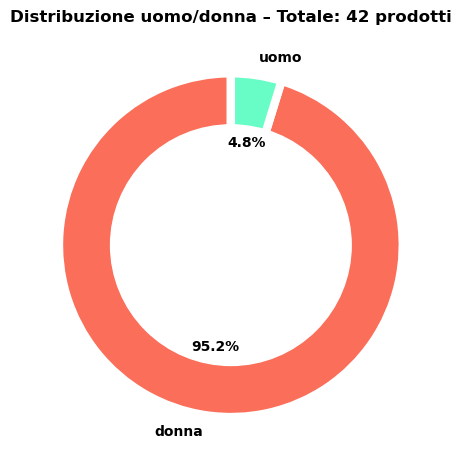

In [283]:
import matplotlib.pyplot as plt

# Dati
conteggio_sesso = df_uomo_donna["sesso"].value_counts()
labels = conteggio_sesso.index.tolist()
sizes = conteggio_sesso.values.tolist()

# Colori personalizzati (rispettando l'ordine delle label)
colori = ['#fb6e5a' if l.lower() == 'donna' else '#68fdc6' for l in labels]

# Cerchio interno (per donut)
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Donut chart
plt.pie(
    sizes,
    labels=[f"{l}" for l in labels],
    colors=colori,
    wedgeprops={'linewidth': 6, 'edgecolor': 'white'},
    startangle=90,
    autopct=lambda p: f'{p:.1f}%',  # percentuale con 1 decimale
    textprops={'weight': 'bold'}   # grassetto su etichette e % 
)

# Aggiungi cerchio bianco al centro
p = plt.gcf()
p.gca().add_artist(my_circle)

# Titolo in grassetto
plt.title(f"Distribuzione uomo/donna – Totale: {sum(sizes)} prodotti", weight='bold')

plt.tight_layout()
plt.savefig("grafico_donut.png", dpi=300, bbox_inches='tight')
plt.show()


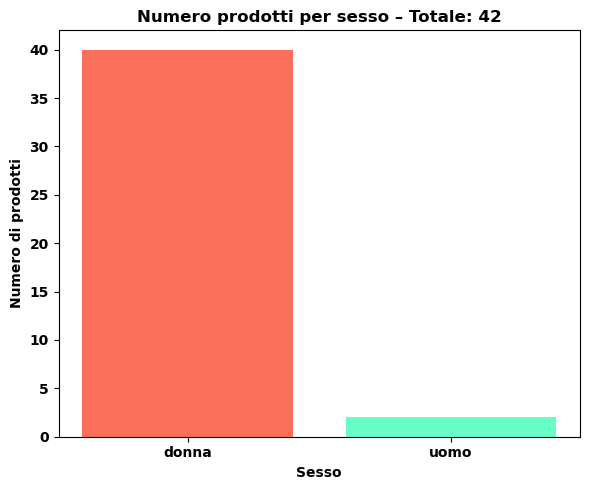

In [307]:
import matplotlib.pyplot as plt

# Dati
conteggio_sesso = df_uomo_donna["sesso"].value_counts()
labels = conteggio_sesso.index.tolist()
values = conteggio_sesso.values.tolist()

# Colori personalizzati nell'ordine corretto
colori = ['#fb6e5a' if l.lower() == 'donna' else '#68fdc6' for l in labels]

# Grafico a colonne
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colori)

# Titolo e assi
plt.title(f"Numero prodotti per sesso – Totale: {sum(values)}", fontweight='bold')
plt.ylabel("Numero di prodotti", fontweight='bold')
plt.xlabel("Sesso", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.savefig("grafico_donut.png", dpi=300, bbox_inches='tight')
plt.show()


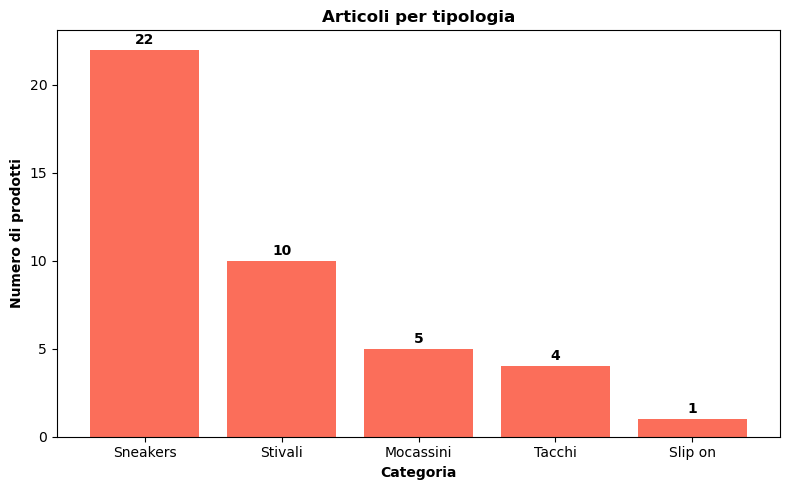

In [325]:
import matplotlib.pyplot as plt

# Conta i prodotti per categoria
conteggio_categoria = df_uomo_donna["categoria"].value_counts()

# Crea il grafico
plt.figure(figsize=(8, 5))
bars = plt.bar(conteggio_categoria.index, conteggio_categoria.values, color="#fb6e5a")  # puoi personalizzare il colore

# Etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.18, f"{int(yval)}",
             ha='center', va='bottom', fontweight='bold')

# Titolo e assi in grassetto
plt.title("Articoli per tipologia", fontweight='bold')
plt.xlabel("Categoria", fontweight='bold')
plt.ylabel("Numero di prodotti", fontweight='bold')
plt.xticks(rotation=0, ha='center')


plt.tight_layout()
plt.savefig("grafico_tip.png", dpi=300, bbox_inches='tight')
plt.show()


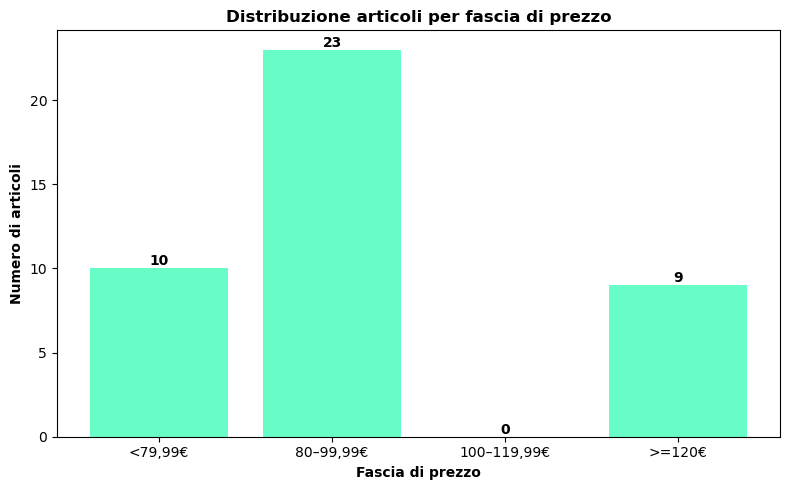

In [357]:
import matplotlib.pyplot as plt

# Conteggio per fascia di prezzo (già ordinato manualmente se necessario)
conteggio_fasce = df_uomo_donna["fascia_prezzo"].value_counts(sort=False)

# Colore unico in stile femminile (puoi modificarlo a piacere)
colore = "#68fdc6"

# Crea il grafico
plt.figure(figsize=(8, 5))
bars = plt.bar(conteggio_fasce.index, conteggio_fasce.values, color=colore)

# Etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    offset = yval * 0  # 2% sopra la barra
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, f"{int(yval)}",
             ha='center', va='bottom', fontweight='bold')

# Titoli e assi in grassetto
plt.title("Distribuzione articoli per fascia di prezzo", fontweight='bold')
plt.xlabel("Fascia di prezzo", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=0)


plt.tight_layout()
plt.savefig("grafico_range.png", dpi=300, bbox_inches='tight')
plt.show()


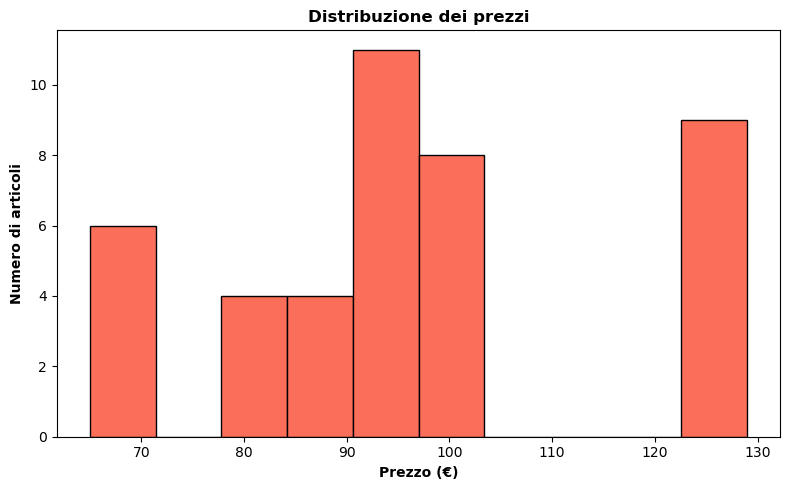

In [365]:
import matplotlib.pyplot as plt

# Istogramma della colonna prezzo
plt.figure(figsize=(8, 5))
plt.hist(df_uomo_donna["prezzo"], bins=10, color="#fb6e5a", edgecolor='black')

# Titoli e assi
plt.title("Distribuzione dei prezzi", fontweight='bold')
plt.xlabel("Prezzo (€)", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')


plt.tight_layout()
plt.savefig("grafico_range.png", dpi=300, bbox_inches='tight')
plt.show()


<Axes: >

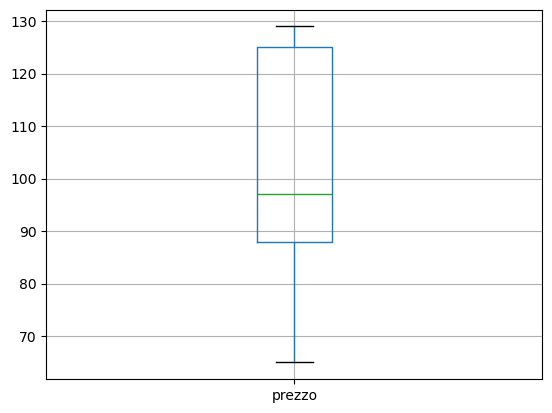